# Business Problem

Customer churn occurs when customers cease doing business with a firm. Retaining existing customers is more cost efficient than trying to attract new customers. 

With intense competition in the telecommunications industry, it would thus be advantageous for a firm to be able to predict if certain customers are likely to cease their service since the firm may attempt to persuade them to stay through various means such as attractive discounts or packages.

#### Columns are masked in the data set 

## Task and Approach: 

The goal is to predict target (Customer will churn or not ) by Using different machine learning algorithms Here we are going to use SVM classifier.

The “Churn” column is our target.why a customer is leaving company products and what are factors leading customers to churn

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading a csv file
df = pd.read_csv('customer_churn.csv')

In [3]:
#Dimension of a dataframe
df.shape

(7043, 21)

In [4]:
#First 10 rows of a dataframe
df.head(10)

,customerID,gender,V1,V2,V3,V4,V5,V6,V7,V8,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
#Names of all the columns
df.columns

Index(['customerID', 'gender', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'Churn'],
      dtype='object')

In [6]:
#Information about all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerID  7043 non-null   object 
 1   gender      7043 non-null   object 
 2   V1          7043 non-null   int64  
 3   V2          7043 non-null   object 
 4   V3          7043 non-null   object 
 5   V4          7043 non-null   int64  
 6   V5          7043 non-null   object 
 7   V6          7043 non-null   object 
 8   V7          7043 non-null   object 
 9   V8          7043 non-null   object 
 10  V9          7043 non-null   object 
 11  V10         7043 non-null   object 
 12  V11         7043 non-null   object 
 13  V12         7043 non-null   object 
 14  V13         7043 non-null   object 
 15  V14         7043 non-null   object 
 16  V15         7043 non-null   object 
 17  V16         7043 non-null   object 
 18  V17         7043 non-null   float64
 19  V18         7043 non-null  

### Data Quality and missing values check

Lets write one function to find out missing values ,unique values ,data types 

In [7]:
#Create function to get summary about dataframe
def df_summary(df):
    #Create 3 Series object in order to store no of unique values, missing values and data type
    df_U = df.nunique()
    df_M = df.isnull().sum()
    df_D = df.dtypes
    
    #Convert series object to dataframe and reset index
    df_U = df_U.to_frame().reset_index()
    df_M = df_M.to_frame().reset_index()
    df_D = df_D.to_frame().reset_index()
    
    #Renaming columns of these dataframes
    df_U.rename(columns = {0 : 'Unique Data'}, inplace=True)
    df_M.rename(columns = {0 : 'Missing Data'}, inplace=True)
    df_D.rename(columns = {0 : 'Data Type'}, inplace=True)
    
    #Merging above dataframes 
    result_df = pd.merge(pd.merge(df_U, df_M, on='index'), df_D, on='index')
    return result_df

In [8]:
#Summary of a dataframe
df_summary(df)

,index,Unique Data,Missing Data,Data Type
0,customerID,7043,0,object
1,gender,2,0,object
2,V1,2,0,int64
3,V2,2,0,object
4,V3,2,0,object
5,V4,73,0,int64
6,V5,2,0,object
7,V6,3,0,object
8,V7,3,0,object
9,V8,3,0,object


#### Important points to note from above dataframe 

* From Data types we can identify one 2 integer ,1 float ,18 string variables are there in our data.

* From Unique values

    1. 13 variables having binary & multi class
    2. We know that Customer ID has uniqueness in the data
    3. All variables are looking good but Surprislingly among all the variables V18 having many classes 
<br><br>    
* We will look into the variables more closely

In [9]:
#View first 10 records of V18 column
df.V18.head(10)

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: V18, dtype: object

* Seems the variables is wrongly classified as object data type.
<br><br>
* We will convert this column into Numerical.

In [10]:
#Convert V18 column into numerical column
df.V18 = pd.to_numeric(df.V18, errors='coerce')  #'coerce' : invalid parsing will be set as NaN.
#Let's check data type of V18 column again by calling df_summary function
df_summary(df)

,index,Unique Data,Missing Data,Data Type
0,customerID,7043,0,object
1,gender,2,0,object
2,V1,2,0,int64
3,V2,2,0,object
4,V3,2,0,object
5,V4,73,0,int64
6,V5,2,0,object
7,V6,3,0,object
8,V7,3,0,object
9,V8,3,0,object


* After coverting to numerical we have identified that there are 11 missing oberveration in V18 Variable.
<br><br>
* Lets Impute the missing values with the mean of the variables since it has only 11

In [11]:
#Replacing missing values in V18 columns with mean of this column
df['V18'].fillna(df['V18'].mean(), inplace=True)
df['V18'].isnull().sum()

0

As we dicussed above we will drop the customer id column since it will not give much more prediciton 

In [12]:
#Drop customerID column
df.drop('customerID', axis=1, inplace=True)
df.columns

Index(['gender', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'Churn'],
      dtype='object')

Lets seprate Numerical columns and object columns seperatly.

In [13]:
#Separate Numerical columns and Categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=np.object).columns.tolist()

In [14]:
print("Numerical columns : ", num_cols)
print("Categorical columns : ", cat_cols)

Numerical columns :  ['V1', 'V4', 'V17', 'V18']
Categorical columns :  ['gender', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'Churn']


Let's see all the categorical & numerical information one by one.

for numerical variables we can use describe function directly 

In [15]:
#Summary of numerical columns
df.describe()

,V1,V4,V17,V18
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
#Summary of categorical columns
df.describe(include=np.object)

,gender,V2,V3,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


* We can see those values w.r.to Target data.
<br><br>
* Lets plot these variables with target.

### Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002466FDA5430>,
      dtype=object)

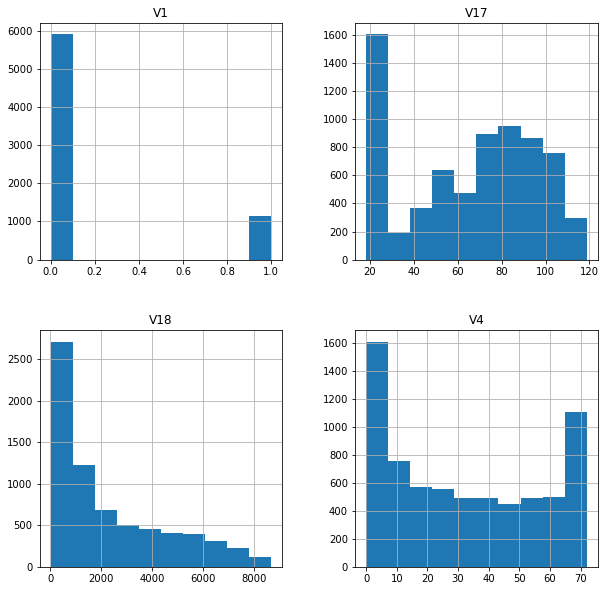

In [17]:
#Plotting histogram of all numerical columns
df[num_cols].hist(figsize=(10, 10))

Data is skewed in V17 & V18 varibles 

#### Lets see the binary and multiclass variables


Creating function to see all the object data type variables using single function

In [18]:
#Creating function to display details of categorical data
def cat_col_desc(df):
    col_list = df.select_dtypes(include=np.object).columns.tolist()
    for i in col_list:
        print("Variable : ", i)
        print("Count of unique values : ", len(set(df[i])))
        print("Unique values : ", set(df[i]))
        print("###############################################################################################################")

In [19]:
#Details of categorical variables
cat_col_desc(df)

Variable :  gender
Count of unique values :  2
Unique values :  {'Male', 'Female'}
###############################################################################################################
Variable :  V2
Count of unique values :  2
Unique values :  {'No', 'Yes'}
###############################################################################################################
Variable :  V3
Count of unique values :  2
Unique values :  {'No', 'Yes'}
###############################################################################################################
Variable :  V5
Count of unique values :  2
Unique values :  {'No', 'Yes'}
###############################################################################################################
Variable :  V6
Count of unique values :  3
Unique values :  {'No', 'No phone service', 'Yes'}
###############################################################################################################
Variable :  V7
Count of unique values :  

In [20]:
#Seperate binary class variables and multi class variables from categorical variables
binary_class = df[cat_cols].nunique()[df[cat_cols].nunique() == 2].keys().tolist()
multi_class = df[cat_cols].nunique()[df[cat_cols].nunique() > 2].keys().tolist()

In [21]:
print("Binary class variables : ", binary_class)
print("Multi class variables : ", multi_class)

Binary class variables :  ['gender', 'V2', 'V3', 'V5', 'V15', 'Churn']
Multi class variables :  ['V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16']


#### Look at distribution of binary class variables 

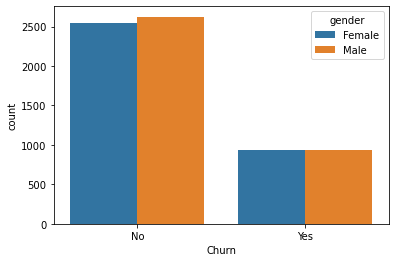

In [22]:
#Plot countplot of Churn variable by gender wise
sns.countplot(x='Churn', hue='gender', data=df)

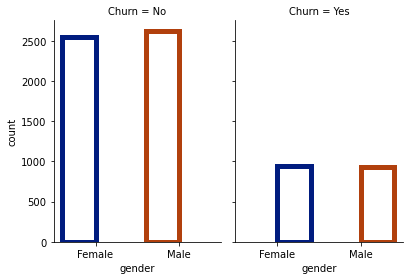

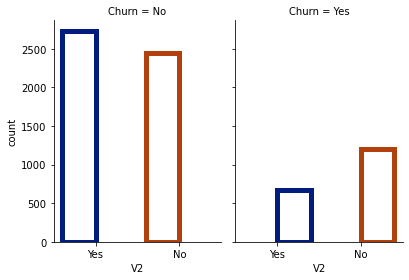

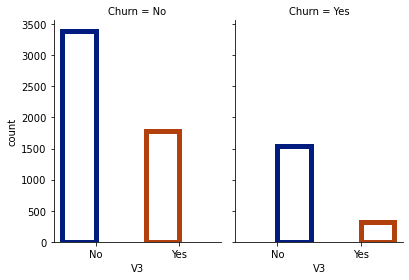

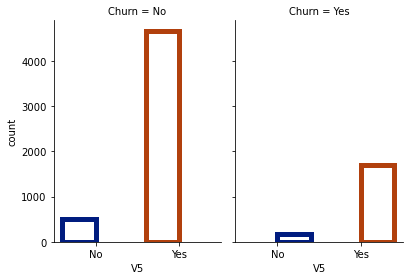

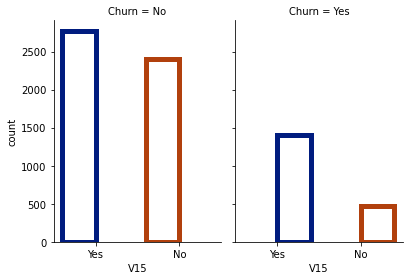

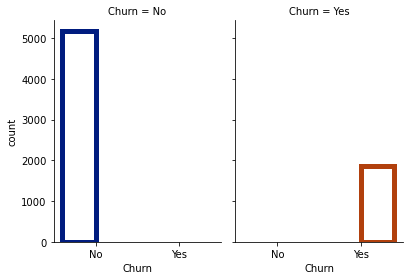

In [23]:
#Plotting catplot of all binary class variables
for i in binary_class:
    sns.catplot(x=i, hue='Churn', data=df, col='Churn', kind='count',height=4, aspect=0.7, facecolor=(0, 0, 0, 0),
                linewidth=5, edgecolor=sns.color_palette('dark', 5))

#### Look at distribution of multi class variables 

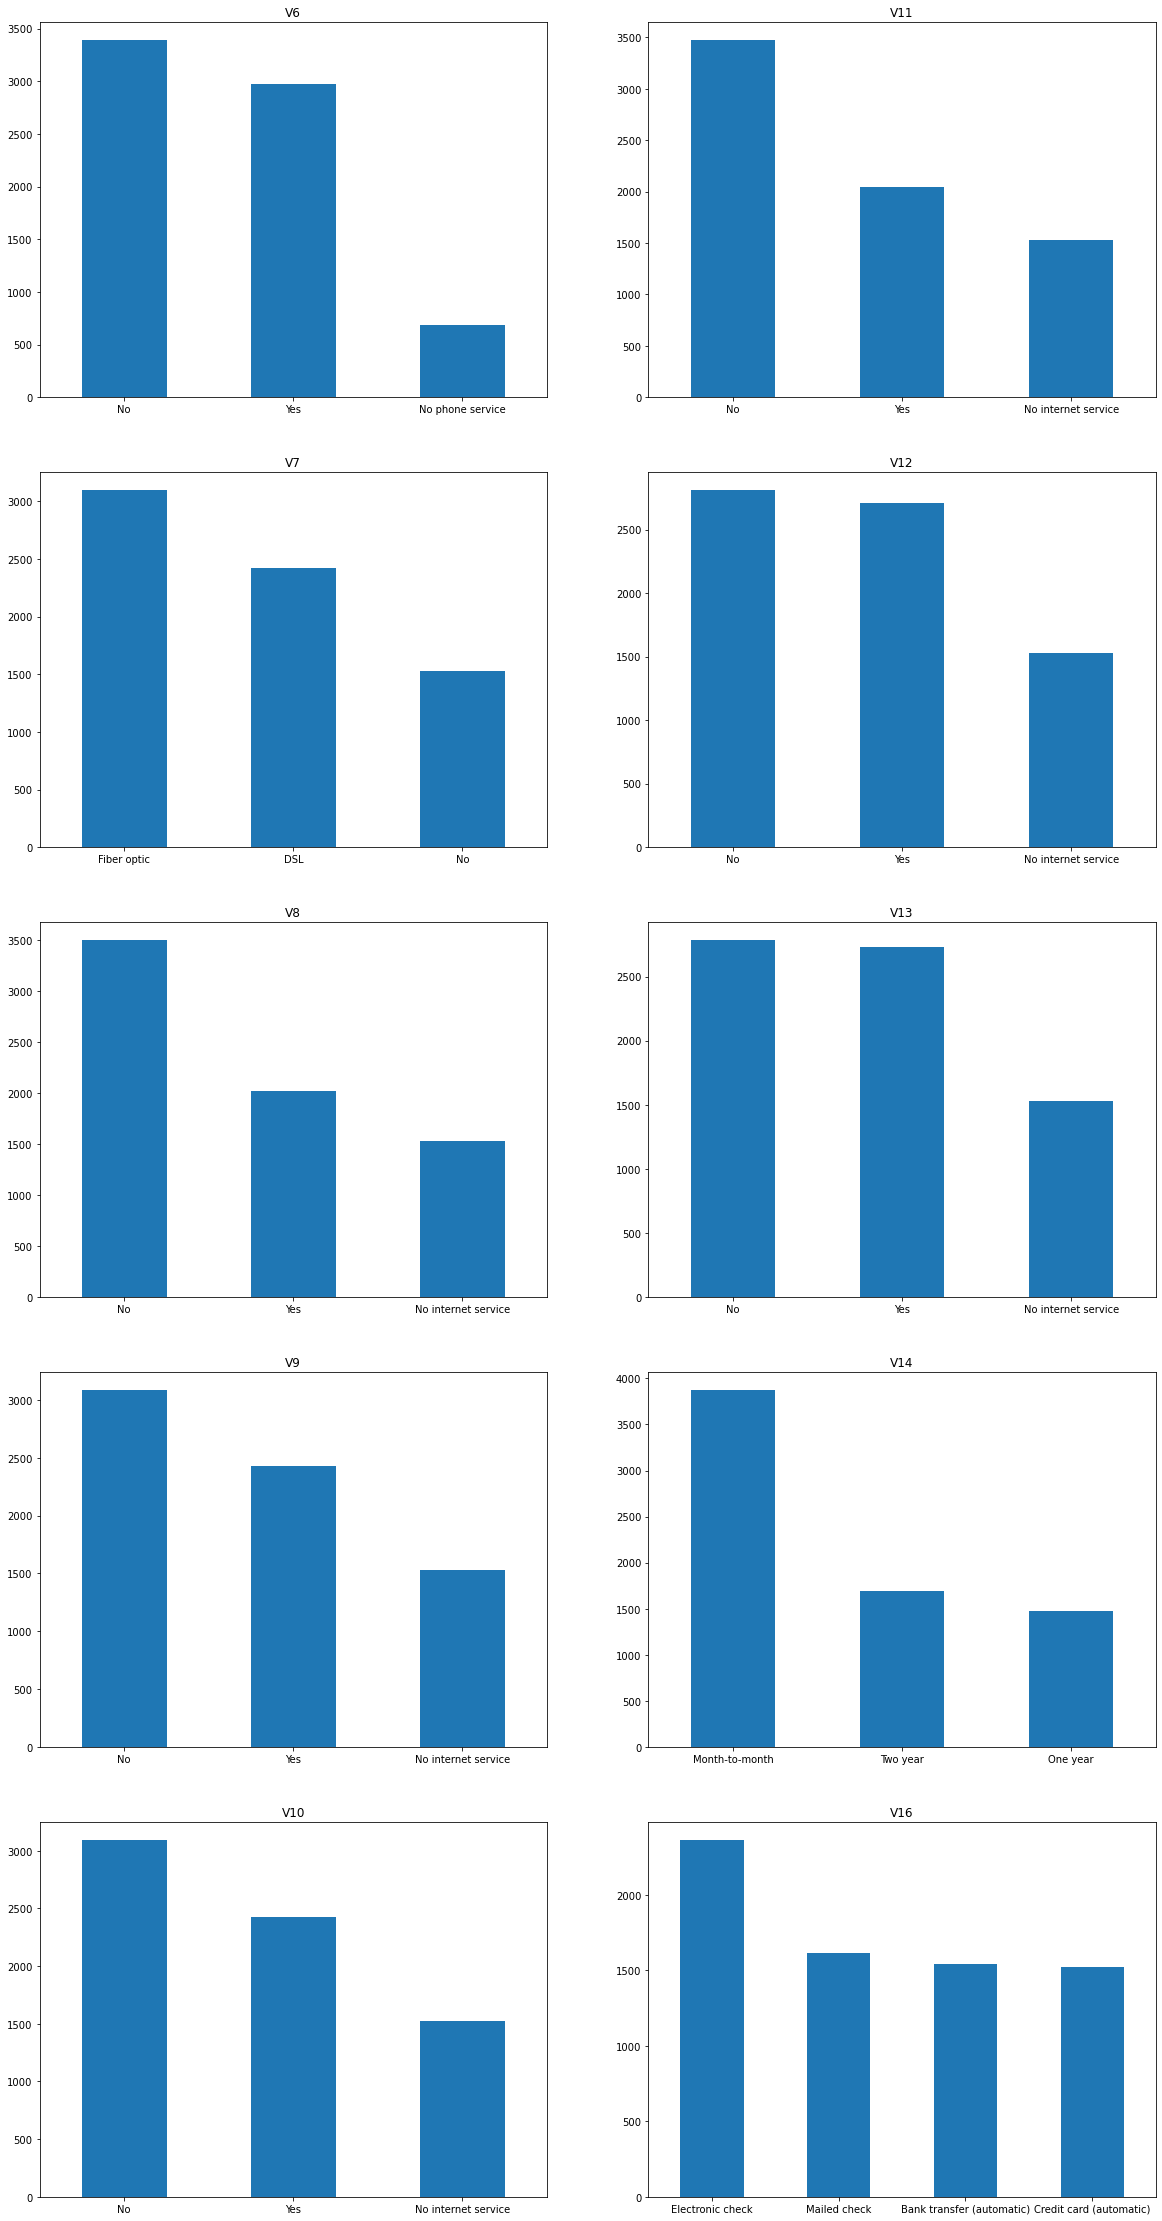

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 40))
for i, item in enumerate(multi_class):
    if i < 5:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0)
    elif i <= 9:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i-5, 1], rot=0)
    ax.set_title(item)

### Transforming the data 

In [25]:
#Implement Label Encoding on binary variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in binary_class:
    df[i] = le.fit_transform(df[i])

In [26]:
#First 10 rows of a dataframe
df.head(10)

,gender,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [27]:
#Create dummy variables from multi class variables
dummies_df = pd.get_dummies(df[multi_class])
dummies_df.head(10)

,V6_No,V6_No phone service,V6_Yes,V7_DSL,V7_Fiber optic,V7_No,V8_No,V8_No internet service,V8_Yes,V9_No,...,V13_No,V13_No internet service,V13_Yes,V14_Month-to-month,V14_One year,V14_Two year,V16_Bank transfer (automatic),V16_Credit card (automatic),V16_Electronic check,V16_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
5,0,0,1,0,1,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
6,0,0,1,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
7,0,1,0,1,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
8,0,0,1,0,1,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
9,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [28]:
#Dimension of a dataframe with numerical columns
df[num_cols].shape

(7043, 4)

In [29]:
#Dimension of a dataframe with binary class columns
df[binary_class].shape

(7043, 6)

In [30]:
#Dimension of a dataframe with multi class columns
df[multi_class].shape

(7043, 10)

In [31]:
#Concat numerical columns, binary class columns and multi class columns
final_df = pd.concat([df[num_cols], df[binary_class],dummies_df], axis=1)
final_df.shape

(7043, 41)

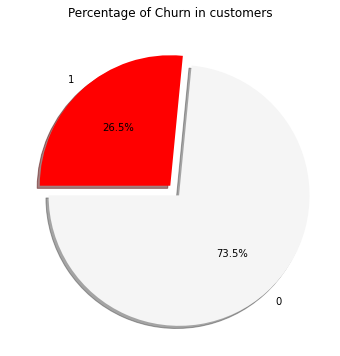

In [32]:
#Data to plot
labels = final_df['Churn'].value_counts(sort=True).index
sizes = final_df['Churn'].value_counts(sort=True)

colors = ['whitesmoke', 'red']
explode = [0.1, 0]     #Explode first slice

#Create Pie chart of Churn variable
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=180)
plt.title('Percentage of Churn in customers')
plt.show()

### Correlation 

Lets check the correlation between the variables 

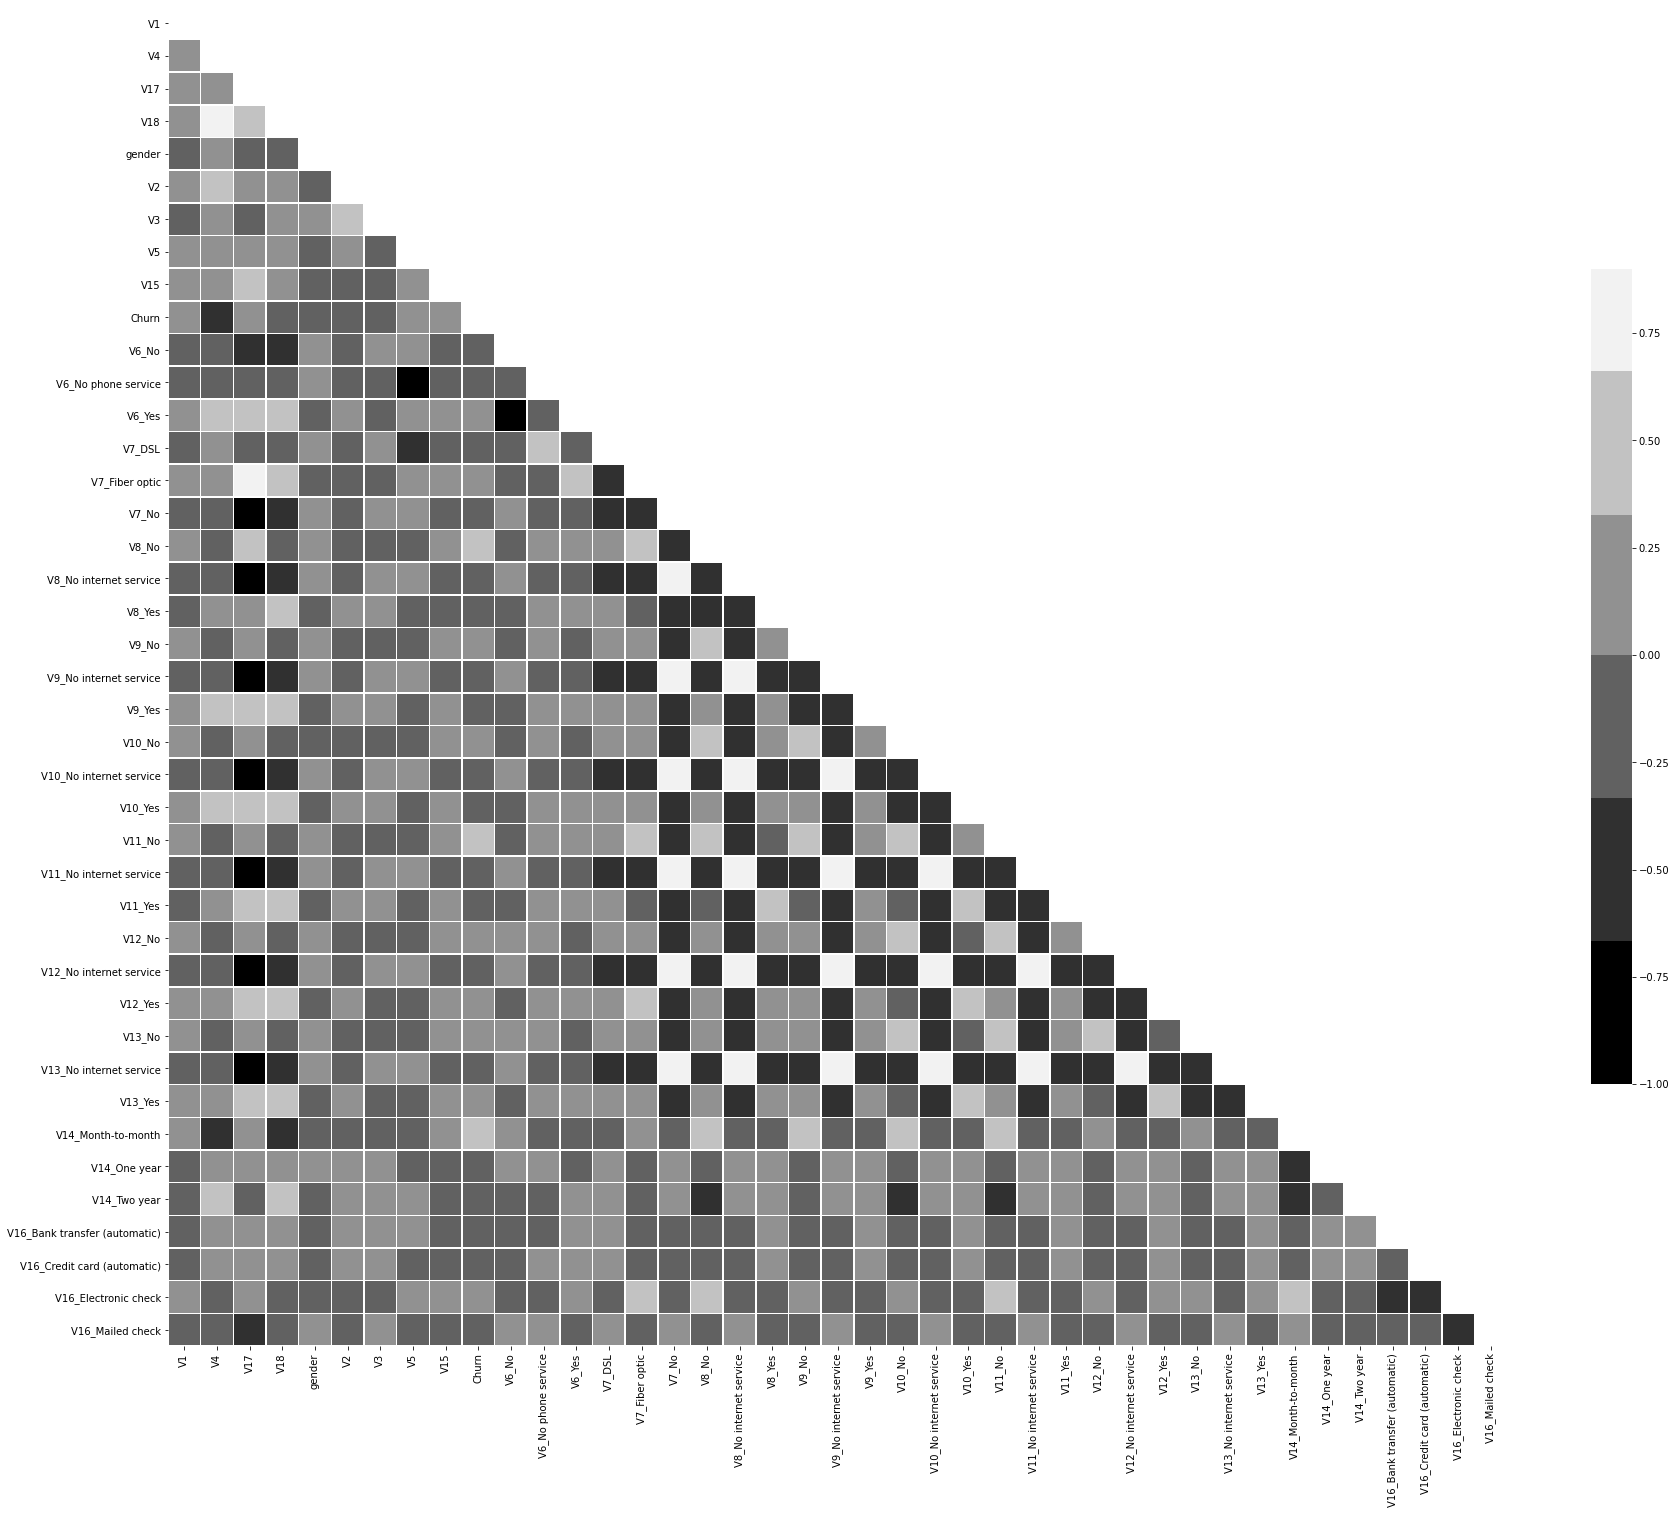

In [33]:
#Correlation
corr = final_df.corr()

#Generate a mask for upper triangle
mask = np.zeros_like(corr, dtype=np.bool)  #To create a matrix of zeros of same size of corr matrix which have boolean values
mask[np.triu_indices_from(mask)] = True    #To assign True value in upper triangle of matrix

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

#Generate a custom diverging colormap
cmap = sns.light_palette('black', reverse=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.9, center=0, square=True, linewidths=0.5, cbar_kws={'shrink' : 0.5})

From the above heatmap we can see the highly correlated variables with dark black associated
For example

V4 variable is highly correlated with V14 Month to Month and Churn V17 is correlated with most of the variables with No internete service and NO classes.

Like the above examples we can interpret the variables with most correlated in the same data set

In [34]:
#Separate Independent and Dependent columns
X = final_df.loc[:, final_df.columns != 'Churn']
y = final_df['Churn']

In [35]:
#Creating Train and Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11)

In [36]:
#Dimension of a Train and Test set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 40), (1409, 40), (5634,), (1409,))

### Important variables

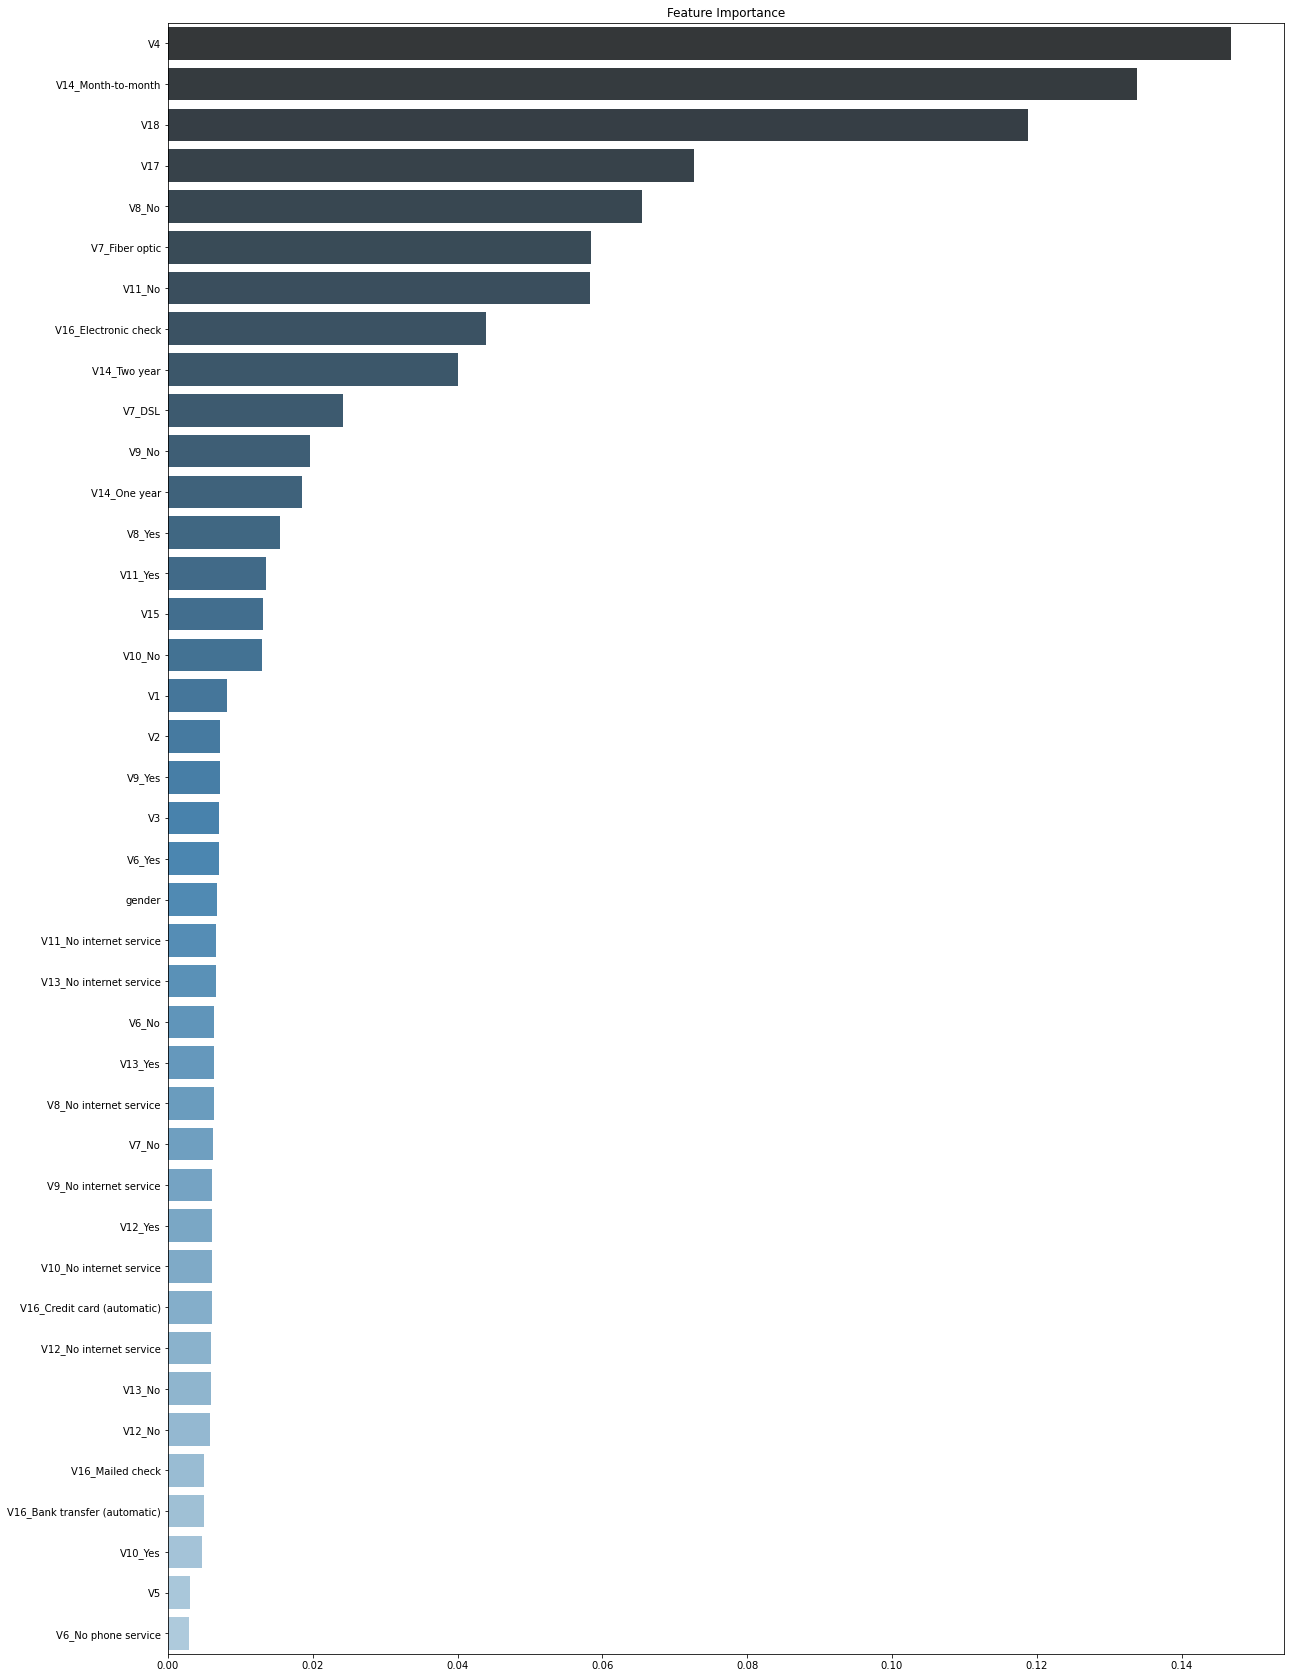

In [37]:
#Implement Random Forest model in order to know about important variables
from sklearn.ensemble import RandomForestClassifier
parameters = {'random_state' : 0, 'n_jobs' : 4, 'n_estimators' : 5000, 'max_depth' : 8}
rfc = RandomForestClassifier(**parameters)
rfc.fit(X, y)

#Plot feature importance
imp = pd.Series(data=rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(20, 30))
plt.title('Feature Importance')
sns.barplot(x=imp.values, y=imp.index, palette='Blues_d', orient='h')

Since V4 having the highest important variables lets look more closely

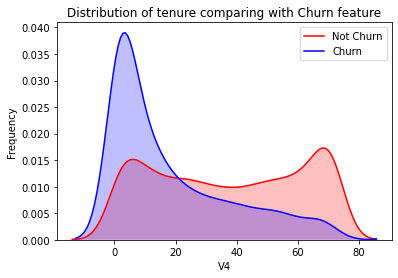

In [38]:
#V4 distribution
g = sns.kdeplot(final_df.V4[(final_df['Churn'] == 0)], color='red', shade=True)
g = sns.kdeplot(final_df.V4[(final_df['Churn'] == 1)], color='blue', shade=True)
g.set_xlabel('V4')
g.set_ylabel('Frequency')
plt.title('Distribution of tenure comparing with Churn feature')
g = g.legend(['Not Churn', 'Churn'])

There is a chance that customer will churn based on V4 . Lesser the range more chance of churn 

In [39]:
print(sorted(final_df['V4'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]


###  Using Grid Search with SVM classifier

In [40]:
# Define model parameters to tune
model_parameters = {
    'C' : [1,10,100,1000],
    'class_weight' : [None,'balanced'],
    'gamma' : [0.1,0.01,0.001,0.0001]
}

In [41]:
#GridSearch the parameters to find the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC(probability=True)

gscv = GridSearchCV(estimator=svc,
                   param_grid=model_parameters,
                   cv=5,
                   verbose=1,
                   n_jobs=-1,
                   scoring='f1')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 19.6min finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [42]:
print("The best parameters are : ", gscv.best_params_)

The best parameters are :  {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.0001}


### Implement SVM with the best parameters

In [43]:
#Create a SVC model with the best parameters
svc = SVC(**gscv.best_params_, probability=True)
svc.fit(X_train, y_train)

SVC(C=1000, class_weight='balanced', gamma=0.0001, probability=True)

In [44]:
#Make a predictions on test data
y_pred = svc.predict(X_test)

### Evaluating our SVC model

In [45]:
#Score on Train data
svc.score(X_train, y_train)

0.8367057152999645

In [46]:
#Score on Test data
svc.score(X_test, y_test)

0.7444996451383961

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("Precision Score : ", precision_score(y_test, y_pred))
print("Recall Score : ", recall_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred))
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))

Accuracy Score :  0.7444996451383961
Precision Score :  0.5131086142322098
Recall score :  0.732620320855615
F1 Score :  0.60352422907489
ROC AUC Score :  0.740706295693508
Confusion Matrix : 
 [[775 260]
 [100 274]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.51      0.73      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.74      0.76      1409

